## Stacking

# what is stacking?
- Stacking is an ensemble learning method that combines multiple models to improve predictive performancess

## How stacking works?
- Train base model
- Create Meta-Features
- Train Meta-Model

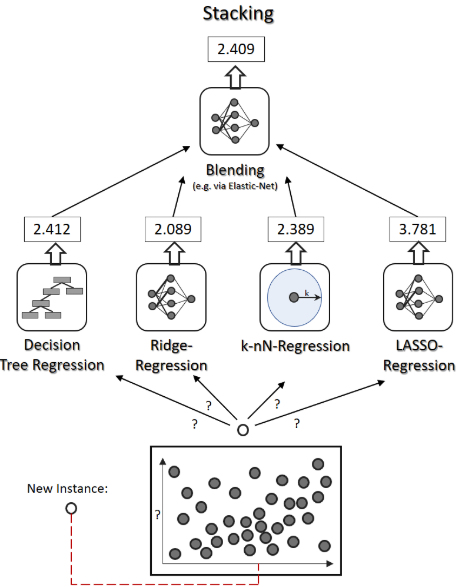

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [2]:
# load data
data = load_iris()
X = data.data
y = data.target

In [3]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [4]:
# Define base model 

base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=3)),
    ('svc', SVC(probability=True, kernel='linear')),
    ('lr', LogisticRegression(solver='lbfgs', max_iter=3000))
]

In [5]:
# Define the stacking model with Logistic Regression as the meta-model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [6]:
# Train 
stacking_model.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=3)),
                               ('svc', SVC(kernel='linear', probability=True)),
                               ('lr', LogisticRegression(max_iter=3000))],
                   final_estimator=LogisticRegression())

In [7]:
# Prediction 
y_pred = stacking_model.predict(X_test)

In [8]:
# Evaluate 
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [9]:
# Evalation base model individually 
for name, model in base_learners:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    base_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model accuracy is {base_accuracy}")

dt Model accuracy is 1.0
svc Model accuracy is 1.0
lr Model accuracy is 1.0
